## OligoFISSEQ analysis walkthrough

Please check the README.md for the installation of the requirements

### Download Fiji or use you existing installation

In [1]:
// The download from maven can take some minutes
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn sc.fiji fiji 2.0.0-pre-10
// or use and existing Fiji installation 
// %classpath add jar "/home/dcastillo/Fiji.app/jars/*"
// %classpath add jar "/home/dcastillo/Fiji.app/jars/bio-formats/*"
// %classpath add jar "/home/dcastillo/Fiji.app/plugins/*"

Added new repo: scijava.public


null

In [2]:
ij = new net.imagej.ImageJ()
ij.getVersion()

2.0.0-rc-71/1.52i

New dimensions: 526 522 22


### Check input data

The OligoFISSEQ images are stored in the input/ folder.

The input folder should contain one folder per OligoFISSEQ round. The folders should be named round_ folowed by the round order (i.e. round_1, round_2, ...)

Images indide each round folder that need to be aligned should have the same name.

In this example we are going to process an image of the 36plex-5k dataset with 4 rounds of OligoFISSEQ

In [3]:
File input_images_folder = new File('input/');
input_path = input_images_folder.getAbsolutePath();

/home/dcastillo/scratch/workspace/oligoFISSEQ/Notebooks/test/input

### Align the images of 4 rounds of OligoFISSEQ

Run the macro Fiji macro "create_hyperstack_from_rounds.ijm" in the input folder to align and segment the images of the 4 rounds of OligoFISSEQ. Resulting hyperstacks will be saved under the merged/ folder

In [4]:
align_macro = new File("scripts/create_hyperstack_from_rounds.ijm");
result = ij.IJ.runMacro("res=runMacro('"+align_macro.getAbsolutePath()+"','"+input_path+"');");

null

### Detect barcodes

The script detect_barcode_patches.py will be used to detect the barcodes in the hyperstacks. We will need to specify the number of rounds and a csv file with the designed oligopaints barcodes

In [5]:
import java.nio.file.Path; 
import java.nio.file.Paths;

File merged_images_folder = new File('input/merged/');
merged_path = merged_images_folder.getAbsolutePath();
barcode_file = Paths.get(input_path, "probes_36plex_sharing.csv").toString();

/home/dcastillo/scratch/workspace/oligoFISSEQ/Notebooks/test/input/probes_36plex_sharing.csv

The format of the barcode file should be the following:

In [6]:
%%python
import pandas as pd

barcodes = pd.read_csv("input/probes_36plex_sharing.csv", sep='\t')
print(barcodes.head())

  Probe Chr.  Chr. Arm Size      Start        End   Length  Oligos  Probes/Kb  \
0  2pR1    2           93.3    1002895    1660898   658003    5000   7.598750   
1  2pR2    2           93.3   47000022   47664134   664112    5000   7.528851   
2  2pR3    2           93.3   85003257   85751873   748616    5000   6.678992   
3  2qR1    2          149.7   98013273   99071153  1057880    5000   4.726434   
4  2qR2    2          149.7  175000457  175884274   883817    5000   5.657280   

   Readout  
0    11243  
1    43131  
2    31341  
3    13222  
4    42144  


In [7]:
detect_barcodes_script = new File("scripts/detect_barcode_patches.py");
inputs = ["input_folder": merged_path,
          "barcode_file": barcode_file,
          "nbr_rounds"  : 4]
result = ij.script().run(detect_barcodes_script, true, inputs);

java.util.concurrent.FutureTask@900b3b6

/home/dcastillo/scratch/workspace/oligoFISSEQ/Notebooks/test/input/merged/OFQv61_w3_3_decon/roi_1.tif
Using existing roi file /home/dcastillo/scratch/workspace/oligoFISSEQ/Notebooks/test/input/merged/OFQv61_w3_3_decon/roi_1_roi.zip
Compiling round 0

Compiling slice 0

Compiling slice 1

Compiling slice 2

Compiling slice 3

Compiling slice 4

Compiling slice 5

Compiling slice 6

Compiling slice 7

Compiling slice 8

Compiling slice 9

Compiling slice 10

Compiling slice 11

Compiling slice 12

Compiling slice 13

Compiling slice 14

Compiling slice 15

Compiling round 1

Compiling slice 0

Compiling slice 1

Compiling slice 2

Compiling slice 3

Compiling slice 4

Compiling slice 5

Compiling slice 6

Compiling slice 7

Compiling slice 8

Compiling slice 9

Compiling slice 10

Compiling slice 11

Compiling slice 12

Compiling slice 13

Compiling slice 14

Compiling slice 15

Compiling round 2

Compiling slice 0

Compiling slice 1

Compiling slice 2

Compiling slice 3

Compiling slice

Barcodind slices 6

Barcoding roi 0

Barcodind slices 7

Barcoding roi 0

Barcodind slices 8

Barcoding roi 0

Barcodind slices 9

Barcoding roi 0

Barcodind slices 10

Barcoding roi 0

Barcodind slices 11

Barcoding roi 0

Barcodind slices 12

Barcoding roi 0

Barcodind slices 13

Barcoding roi 0

Barcodind slices 14

Barcoding roi 0

Barcodind slices 15

Barcoding roi 0

/home/dcastillo/scratch/workspace/oligoFISSEQ/Notebooks/test/input/merged/OFQv61_w3_3_decon/roi_7.tif
Using existing roi file /home/dcastillo/scratch/workspace/oligoFISSEQ/Notebooks/test/input/merged/OFQv61_w3_3_decon/roi_7_roi.zip
Compiling round 0

Compiling slice 0

Compiling slice 1

Compiling slice 2

Compiling slice 3

Compiling slice 4

Compiling slice 5

Compiling slice 6

Compiling slice 7

Compiling slice 8

Compiling slice 9

Compiling slice 10

Compiling slice 11

Compiling slice 12

Compiling slice 13

Compiling slice 14

Compiling slice 15

Compiling round 1

Compiling slice 0

Compiling slice 1

Compil

Compiling slice 8

Compiling slice 9

Compiling slice 10

Compiling slice 11

Compiling slice 12

Compiling slice 13

Compiling slice 14

Compiling slice 15

Barcodind slices 0

Barcoding roi 0

Barcodind slices 1

Barcoding roi 0

Barcodind slices 2

Barcoding roi 0

Barcodind slices 3

Barcoding roi 0

Barcodind slices 4

Barcoding roi 0

Barcodind slices 5

Barcoding roi 0

Barcodind slices 6

Barcoding roi 0

Barcodind slices 7

Barcoding roi 0

Barcodind slices 8

Barcoding roi 0

Barcodind slices 9

Barcoding roi 0

Barcodind slices 10

Barcoding roi 0

Barcodind slices 11

Barcoding roi 0

Barcodind slices 12

Barcoding roi 0

Barcodind slices 13

Barcoding roi 0

Barcodind slices 14

Barcoding roi 0

Barcodind slices 15

Barcoding roi 0

/home/dcastillo/scratch/workspace/oligoFISSEQ/Notebooks/test/input/merged/OFQv61_w3_3_decon/roi_4.tif
Using existing roi file /home/dcastillo/scratch/workspace/oligoFISSEQ/Notebooks/test/input/merged/OFQv61_w3_3_decon/roi_4_roi.zip
Compiling ro

We should wait for a "Finished!" message before continuing.

The merged/ folder should have been populated with the following files per nuclei:

* roi_{nucleus_nbr}_barcoded.tif          : image of the nucleus where every matched barcode is colored
* roi_{nucleus_nbr}_barcodes_splitted.tif : image where every matched barcode is shown in a separate channel
* roi_{nucleus_nbr}_max_intensity.tif     : maximum intensity projection over all channels over all rounds
* roi_{nucleus_nbr}_punctas.tsv           : tsv file with the information of the matched barcodes for the analysis 

Let's have a look at the barcoded image

<Figure size 720x288 with 0 Axes>

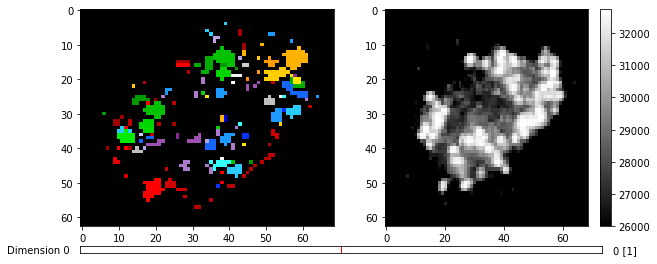

Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


In [52]:
%%python
import matplotlib.pyplot as plt
import numpy as np
from skimage.external import tifffile
from skimage.io import imsave
from skimage.color import gray2rgb
from skimage import exposure
from mpl_toolkits.axes_grid1 import make_axes_locatable

roi_barcode_image_file = "input/merged/OFQv61_w3_3_decon/roi_2_barcoded.tif"
roi_max_intensity_image_file = "input/merged/OFQv61_w3_3_decon/roi_2_max_intensity.tif"

roi_barcode_slice = tifffile.imread(roi_barcode_image_file)
roi_max_intensity_slice = tifffile.imread(roi_max_intensity_image_file)

roi_max_intensity_proj = np.max(roi_max_intensity_slice, axis=0)

plt.figure(figsize=(10, 4))
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,4))

tifffile.imshow(roi_barcode_slice[11],figure=fig,subplot=121,aspect='auto')
f2,s2,a2=tifffile.imshow(roi_max_intensity_proj,figure=fig,cmap=plt.cm.gray,subplot=122,
               vmin=26000, vmax=None, aspect='auto')



plt.show()
roi_max_intensity_slice_rgb = exposure.rescale_intensity(roi_max_intensity_proj,
                                                           in_range=(26000, roi_max_intensity_slice.max()))
imsave('input/roi_max_intensity.png',gray2rgb(roi_max_intensity_slice_rgb))

In the roi_{nucleus_nbr}_punctas.tsv we find information for the analysis of the positions

In [26]:
%%python
roi_puncta_file = "input/merged/OFQv61_w3_3_decon/roi_2_punctas.tsv"
roi_punctas = pd.read_csv(roi_puncta_file, sep='\t')
print(roi_punctas.head())

   barcode  roi  max_intensity_pixel_x  max_intensity_pixel_y  \
0    21314    0               9.334501               7.200901   
1    21314    0              10.668001               5.600700   
2    21314    0               9.067801               7.734301   
3    21314    0               7.467601               7.734301   
4    21314    0              14.401801              10.134601   

   max_intensity_pixel_z  max_intensity  nbr_pixels  match_barcodes  \
0                    0.0       0.679586           1               4   
1                    0.0       0.651315           1               4   
2                    0.5       0.741655           4               4   
3                    1.0       0.733699           6               4   
4                    0.5       0.583588           1               4   

   center_pixel_x  center_pixel_y  center_pixel_z  max_intensity_0  \
0        9.334501        7.200901        0.000000         0.668890   
1       10.668001        5.600700        0

### Tier 1 detection

In the tsv file we have all the possible patches in the images. We can apply our filters to the data to obtain the strong positives

In [27]:
%%python
thresholds = {('SOLiD',4,'MSBS',False):(64000./(2**16-1),63500./(2**16-1),0)}

roi_punctas['avg_intensity3'] = roi_punctas[['max_intensity_0','max_intensity_1','max_intensity_2']].mean(axis=1)
use_threshold = ('SOLiD',4,'MSBS',False)

roi_punctas = roi_punctas.drop(roi_punctas[(roi_punctas['max_intensity_0']<thresholds[use_threshold][0])
                                             & (roi_punctas['max_intensity_1']<thresholds[use_threshold][0])
                                             & (roi_punctas['max_intensity_2']<thresholds[use_threshold][0])
                                             & (roi_punctas['max_intensity_3']<thresholds[use_threshold][0])].index)
    
roi_punctas = roi_punctas.drop(roi_punctas[(roi_punctas['avg_intensity3']<thresholds[use_threshold][1])].index)

We can assign our barcodes to the targeted loci

In [28]:
%%python
barcodes = [11243,43131,31341,13222,42144,32311,12321,42212,21314,14232,43232,32133,11313,43341,32143,13314,41143,34324,
            32442,41234,22433,33332,12112,31224,42314,14323,22344,42413,32232,12434,41323,33414,13133,24442,44142,31444]
locis = ['2pR1', '2pR2', '2pR3', '2qR1', '2qR2', '2qR3', '3pR1', '3pR2', '3pR3', '3qR1', '3qR2', '3qR3', '5pR1', '5pR2',
         '5pR3', '5qR1', '5qR2', '5qR3', '16pR1', '16pR2', '16pR3', '16qR1', '16qR2', '16qR3',
         '19pR1', '19pR2', '19pR3', '19qR1', '19qR2', '19qR3', 'XpR1', 'XpR2', 'XpR3', 'XqR1', 'XqR2', 'XqR3']
chrs = list(set([(loci.split('p')[0]).split('q')[0] for loci in locis]))

barcode_loci = dict(zip(barcodes,locis))
roi_punctas['loci'] = roi_punctas.barcode.map(barcode_loci)
print(roi_punctas.head())

     barcode  roi  max_intensity_pixel_x  max_intensity_pixel_y  \
11     21314    0              12.534901               8.801101   
32     21314    0              15.201901               4.000500   
143    13314    0              10.401301              10.134601   
152    13314    0              14.135101               8.267701   
171    32133    0              14.401801               6.134101   

     max_intensity_pixel_z  max_intensity  nbr_pixels  match_barcodes  \
11                     3.0       0.999332         110               4   
32                     4.5       0.976947         132               4   
143                    6.0       0.989582          81               4   
152                    6.0       0.990281          49               4   
171                    3.5       0.995818         138               4   

     center_pixel_x  center_pixel_y  ...  max_intensity_0  second_intensity_0  \
11        12.440344        8.885960  ...         0.999618            0.932588

And check the position of the detected loci in the images

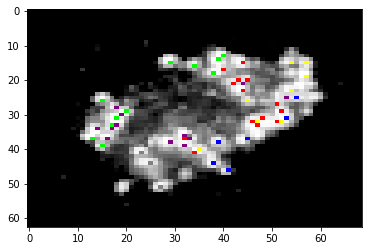

In [57]:
%%python
import matplotlib.pyplot as plt
from skimage.io import imsave
import numpy as np
from PIL import Image, ImageDraw, ImageFont

colors_chrs = {'2':[0,255,0],'3':[255,255,0],'5':[0,0,255],
               '16':[128,0,128],'19':[255,0,0],'X':[128,128,128]}
pixelWidth = 0.265
im = Image.open('input/roi_max_intensity.png')

draw = ImageDraw.Draw(im)
for index,row in roi_punctas.iterrows():
    chrom = (row.loci.split('p')[0]).split('q')[0]
    draw.ellipse((row.max_intensity_pixel_x/pixelWidth, row.max_intensity_pixel_y/pixelWidth,
                  row.max_intensity_pixel_x/pixelWidth+1, row.max_intensity_pixel_y/pixelWidth+1),
                 fill = tuple(colors_chrs[chrom]), outline = tuple(colors_chrs[chrom]))

plt.imshow(np.asarray(im),cmap=plt.cm.gray, vmin=29000, vmax=None, aspect='auto')


### Tier 2 detection

From the tsv file containing all the possible patches we trace we use the script "trace_OligoFISSEQ.py" to trace the chromosomes in our sample image

In [30]:
%%python
import os

output_dir = os.path.dirname(roi_puncta_file)
barcode_file = "input/probes_36plex_sharing.csv"
                         
%run "/home/dcastillo/scratch/workspace/oligoFISSEQ/trace_OligoFISSEQ" --puncta_file $roi_puncta_file \
    --barcode_file $barcode_file --threshold 'SOLiD,4,MSBS,False' -n 4 --outdir $output_dir

input/merged/OFQv61_w3_3_decon/roi_2_punctas.tsv ['3', 'X', '16', '5', '19', '2'] None input/probes_36plex_sharing.csv input/merged/OFQv61_w3_3_decon ['2pR1', '2pR2', '2pR3', '2qR1', '2qR2', '2qR3', '3pR1', '3pR2', '3pR3', '3qR1', '3qR2', '3qR3', '5pR1', '5pR2', '5pR3', '5qR1', '5qR2', '5qR3', '16pR1', '16pR2', '16pR3', '16qR1', '16qR2', '16qR3', 'XpR1', 'XpR2', 'XpR3', 'XqR1', 'XqR2', 'XqR3', '19pR1', '19pR2', '19pR3', '19qR1', '19qR2', '19qR3'] ['3', 'X', '16', '5', '19', '2']
Using filter by minimum intensity: 0.49972528792207777
Processing roi 1
Centers for chromosome  3 [array([12.14547705,  8.62385482,  3.83207989]), array([14.80347393,  4.64374186,  4.36058502])]
Centers for chromosome  X [array([ 6.74667354, 12.10066285,  3.39937497])]
Centers for chromosome  16 [array([4.54825752, 8.532579  , 3.88600102]), array([8.39957203, 9.90295191, 4.19243958])]
Centers for chromosome  5 [array([10.61718325, 11.11498288,  5.56876794]), array([14.74218192,  6.32917321,  4.74479167])]
Cente

The resulting chromosome traces are stored in "roi_{roi_number}_punctas.out"

In [31]:
%%python
roi_traced_file = "input/merged/OFQv61_w3_3_decon/roi_2_punctas_out.tsv"
roi_traced = pd.read_csv(roi_traced_file, sep='\t')
tmp_col = roi_traced['loci'].str.split("-", n = 1, expand = True)
roi_traced['chr'] = roi_traced['chr'].astype(str)
roi_traced['loci'] = tmp_col[0]
roi_traced['ploid'] = tmp_col[1]
print(roi_traced.head())

  roi chr  loci      pos_x      pos_y  pos_z     score  nbr_pixels  \
0   0   3  3pR1  13.868401   8.534401    3.5  1.169237          29   
1   0   3  3pR2  12.534901   8.534401    4.0  1.141052          26   
2   0   3  3pR3  12.534901   8.801101    3.0  1.760187         110   
3   0   3  3qR1  12.001501   6.934201    3.0  1.500915          81   
4   0   3  3qR2  10.934701  10.134601    3.5  0.836015           1   

   max_intensity  match_barcodes ploid  
0       0.995341               4     1  
1       0.988899               4     1  
2       0.999332               4     1  
3       0.950232               4     1  
4       0.865089               4     1  


We check on the image the traces

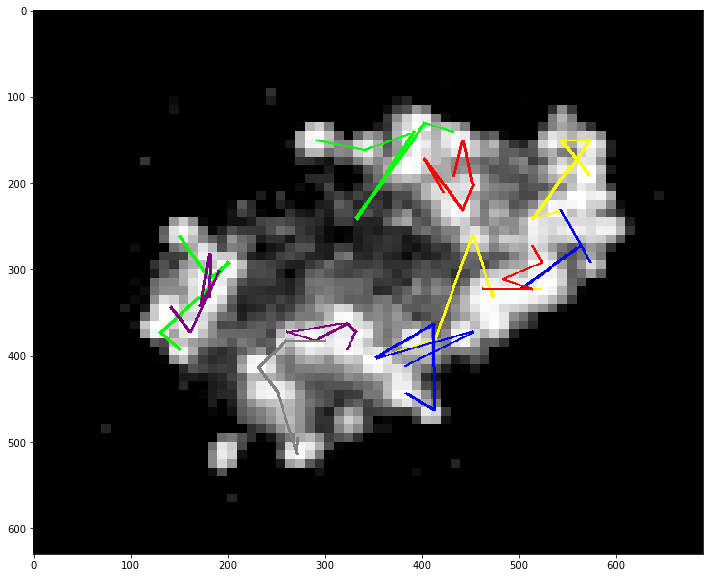

In [58]:
%%python
im = Image.open('input/roi_max_intensity.png')
double_size = (im.size[0]*10, im.size[1]*10)
im = im.resize(double_size,resample=0)
draw = ImageDraw.Draw(im)
for chrom in colors_chrs.keys():
    for pl in range(2):
        chr_locis = roi_traced[(
                           (roi_traced['chr']==chrom)
                           &(roi_traced['ploid']==str(pl+1))      
                           )].sort_values('loci')[['pos_x','pos_y','loci']].values.tolist()
        if len(chr_locis) == 0:
            continue
        for i in range(0,len(chr_locis)-1):
            draw.line((10*chr_locis[i][0]/pixelWidth, 10*chr_locis[i][1]/pixelWidth,
                       10*chr_locis[i+1][0]/pixelWidth+1, 10*chr_locis[i+1][1]/pixelWidth+1),
                       fill = tuple(colors_chrs[chrom]), width=3)

fig, ax = plt.subplots(figsize=(12, 10)) 
ax.imshow(np.asarray(im),cmap=plt.cm.gray, vmin=29000, vmax=None, aspect='auto')